<a href="https://colab.research.google.com/github/ChirudeepG/CMPE-258_Assignment6/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation and Generalization Techniques with TensorFlow:

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 1s 0us/step


2023-04-12 20:07:51.934633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-12 20:07:51.936487: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1569 - accuracy: 0.9508 - val_loss: 0.0506 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0329 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0375 - val_accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0378 - val_ac

2023-04-12 20:09:51.229264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


938/938 [==============================] - 15s 16ms/step - loss: 0.3676 - accuracy: 0.8820 - val_loss: 0.0725 - val_accuracy: 0.9759
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1216 - accuracy: 0.9622 - val_loss: 0.0491 - val_accuracy: 0.9843
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0863 - accuracy: 0.9731 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.0258 - val_accuracy: 0.9905
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0286 - val_accuracy: 0.9921
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0259 - val_accuracy: 0.9919
Epo

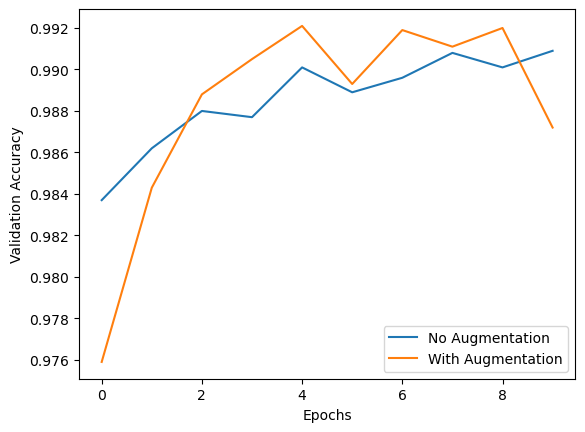

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model for the classification task
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
train_generator = data_gen.flow(x_train, y_train, batch_size=64)
history_aug = model_aug.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# L1 and L2 Regularization in TensorFlow:

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1379 - accuracy: 0.9594 - val_loss: 0.0453 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0363 - val_ac

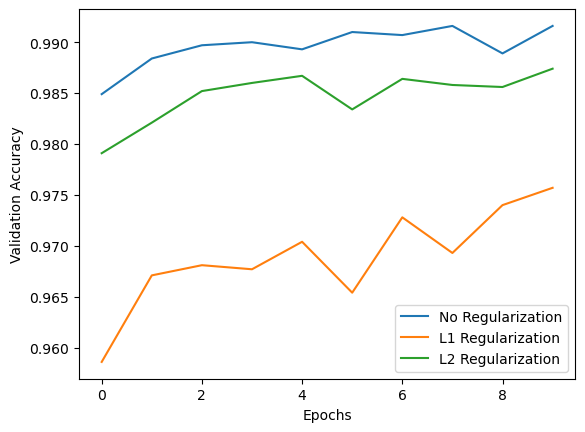

In [ ]:
import tensorflow as tf

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with L1 or L2 regularization
def create_model(regularizer_type="l1", reg_lambda=0.001):
    regularizer = None
    if regularizer_type == "l1":
        regularizer = tf.keras.regularizers.l1(reg_lambda)
    elif regularizer_type == "l2":
        regularizer = tf.keras.regularizers.l2(reg_lambda)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without regularization
model_no_reg = create_model(regularizer_type=None)
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with L1 regularization
model_l1 = create_model(regularizer_type="l1", reg_lambda=0.001)
history_l1 = model_l1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with L2 regularization
model_l2 = create_model(regularizer_type="l2", reg_lambda=0.001)
history_l2 = model_l2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_reg.history["val_accuracy"], label="No Regularization")
plt.plot(history_l1.history["val_accuracy"], label="L1 Regularization")
plt.plot(history_l2.history["val_accuracy"], label="L2 Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# DropOut Regularization in TensorFlow:

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1474 - accuracy: 0.9552 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0398 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0317 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0311 - val_ac

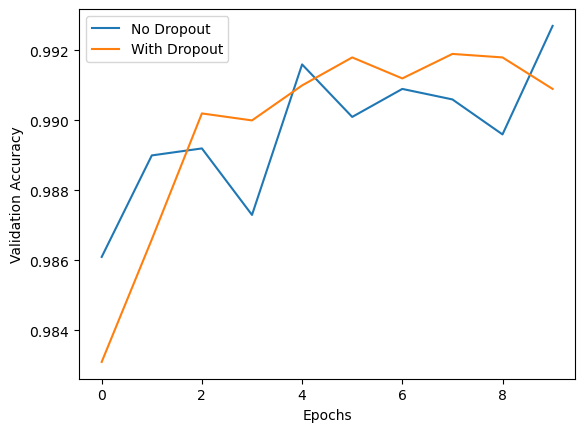

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with dropout regularization
def create_model(dropout_rate=0.0):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without dropout regularization
model_no_dropout = create_model(dropout_rate=0.0)
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with dropout regularization
model_dropout = create_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_dropout.history["val_accuracy"], label="No Dropout")
plt.plot(history_dropout.history["val_accuracy"], label="With Dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Early Stopping regularization in TensorFlow

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1410 - accuracy: 0.9579 - val_loss: 0.0514 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0341 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0284 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0304 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0278 - val_ac

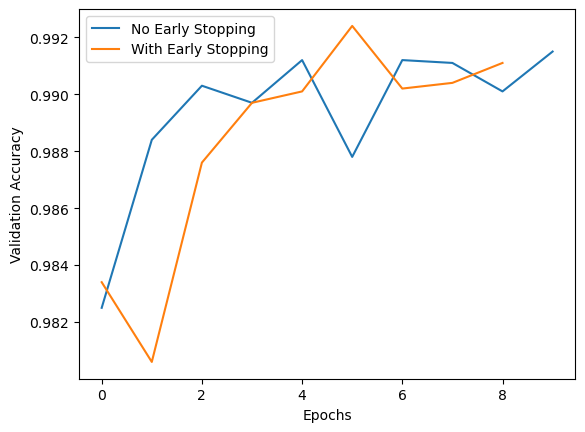

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without early stopping
model_no_earlystop = create_model()
history_no_earlystop = model_no_earlystop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with early stopping
model_earlystop = create_model()
earlystop_callback = EarlyStopping(monitor="val_loss", patience=3)
history_earlystop = model_earlystop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[earlystop_callback])

# Compare the performance
plt.plot(history_no_earlystop.history["val_accuracy"], label="No Early Stopping")
plt.plot(history_earlystop.history["val_accuracy"], label="With Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Monte Carlo Dropout regularization in TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with dropout
def create_model(dropout_rate=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model with dropout regularization
model = create_model(dropout_rate=0.5)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Monte Carlo Dropout: perform multiple forward passes with dropout enabled and average the predictions
def monte_carlo_dropout_predictions(model, samples, T=100):
    mc_dropout_predictions = []
    for t in range(T):
        predictions = model(samples, training=True)
        mc_dropout_predictions.append(predictions)
    
    mc_dropout_predictions = tf.stack(mc_dropout_predictions, axis=0)
    averaged_predictions = tf.reduce_mean(mc_dropout_predictions, axis=0)
    return averaged_predictions

# Calculate Monte Carlo Dropout predictions for test set
mc_dropout_test_predictions = monte_carlo_dropout_predictions(model, x_test)

# Calculate accuracy
correct_predictions = tf.equal(tf.argmax(mc_dropout_test_predictions, axis=1), y_test.flatten())
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

print(f"Monte Carlo Dropout test accuracy: {accuracy:.4f}")


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3110 - accuracy: 0.9039 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1289 - accuracy: 0.9617 - val_loss: 0.0395 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0956 - accuracy: 0.9713 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0263 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.0264 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0245 - val_ac

# weight initializations in TensorFlow

Training with Zeros initializer
Training with Ones initializer
Training with RandomNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with RandomUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with GlorotNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with GlorotUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with HeNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with HeUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


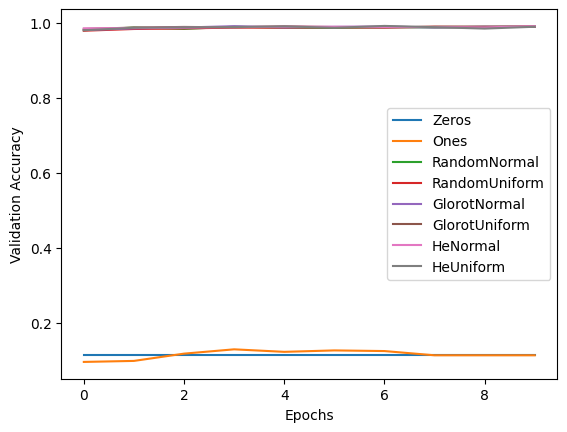

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with different weight initializations
def create_model(initializer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), kernel_initializer=initializer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer=initializer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_initializer=initializer),
        tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=initializer)
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model with different initializations
initializers = {
    "Zeros": tf.keras.initializers.Zeros(),
    "Ones": tf.keras.initializers.Ones(),
    "RandomNormal": tf.keras.initializers.RandomNormal(),
    "RandomUniform": tf.keras.initializers.RandomUniform(),
    "GlorotNormal": tf.keras.initializers.GlorotNormal(),
    "GlorotUniform": tf.keras.initializers.GlorotUniform(),
    "HeNormal": tf.keras.initializers.HeNormal(),
    "HeUniform": tf.keras.initializers.HeUniform(),
}

histories = {}

for name, initializer in initializers.items():
    print(f"Training with {name} initializer")
    model = create_model(initializer)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    histories[name] = history

# Compare the performance
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=name)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
# When to use what:

# Zeros: Not recommended, as it can lead to dead neurons and no learning.

# Ones: Not recommended, as it can lead to saturation and slow convergence.

# RandomNormal or RandomUniform: Can be used, but not optimal for deep networks as they can cause vanishing/exploding gradient problems.

# GlorotNormal (Xavier) or GlorotUniform: Suitable for networks with sigmoid, tanh, or softmax activation functions.

# HeNormal or HeUniform: Suitable for networks with ReLU or leaky ReLU activation functions.

# Batch Normalization in TensorFlow

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1432 - accuracy: 0.9556 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0437 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0325 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0351 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0358 -

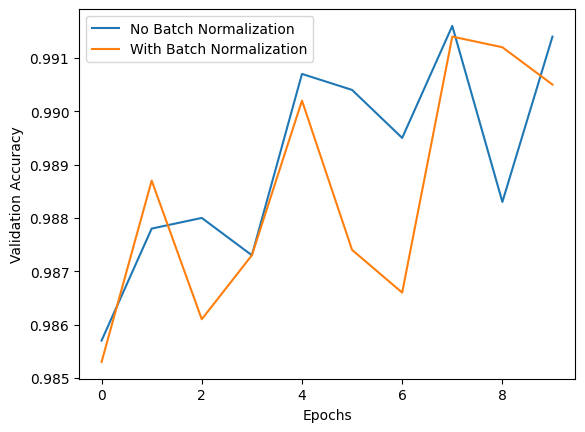

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with and without batch normalization
def create_model(use_batch_norm=False):
    layers = [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]

    if use_batch_norm:
        layers.insert(2, tf.keras.layers.BatchNormalization())
        layers.insert(5, tf.keras.layers.BatchNormalization())

    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without batch normalization
model_no_bn = create_model(use_batch_norm=False)
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with batch normalization
model_bn = create_model(use_batch_norm=True)
history_bn = model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_bn.history["val_accuracy"], label="No Batch Normalization")
plt.plot(history_bn.history["val_accuracy"], label="With Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Custom dropout and Custom regularization in TensorFlow

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 49.4885 - accuracy: 0.1146 - val_loss: 14.0336 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0496 - accuracy: 0.1124 - val_loss: 14.1147 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0235 - accuracy: 0.1124 - val_loss: 13.9335 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0198 - accuracy: 0.1124 - val_loss: 14.0182 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0176 - accuracy: 0.1124 - val_loss: 14.0257 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0136 - accuracy: 0.1124 - val_loss: 14.0921 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 14.0137 - accuracy: 0.1124 - val_loss: 13

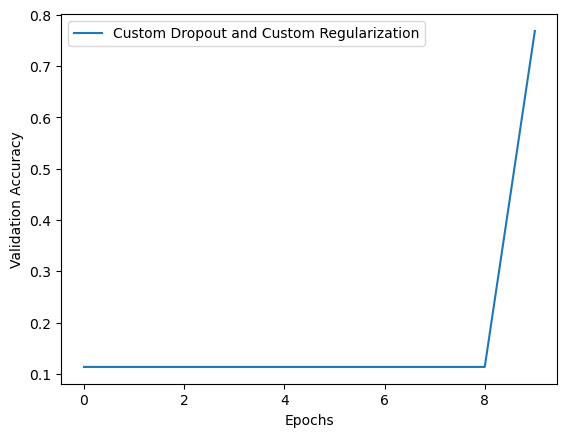

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Custom dropout layer
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

# Custom L1 regularization
def custom_l1_regularizer(weight_matrix):
    return tf.reduce_sum(tf.abs(weight_matrix))

# Create a simple model with custom dropout and custom regularization
def create_model(dropout_rate=0.5, l1_lambda=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=custom_l1_regularizer),
        CustomDropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model with custom dropout and custom regularization
model = create_model(dropout_rate=0.5, l1_lambda=0.01)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the performance
plt.plot(history.history["val_accuracy"], label="Custom Dropout and Custom Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Regularization with Callbacks and TensorBoard in TensorFlow 

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.5188 - accuracy: 0.8939 - val_loss: 0.1935 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3058 - accuracy: 0.9441 - val_loss: 0.1734 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2660 - accuracy: 0.9535 - val_loss: 0.1540 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2482 - accuracy: 0.9578 - val_loss: 0.1489 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2327 - accuracy: 0.9609 - val_loss: 0.1533 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2260 - accuracy: 0.9627 - val_loss: 0.1497 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2233 - accuracy: 0.9641 - val_loss: 0.1483 -

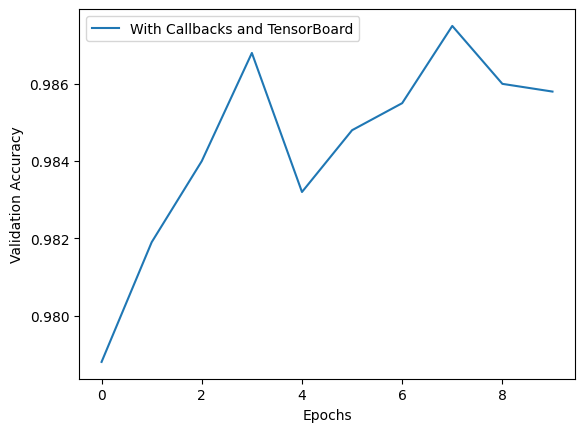

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import datetime

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model with dropout and L2 regularization
def create_model(dropout_rate=0.5, l2_lambda=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model = create_model(dropout_rate=0.5, l2_lambda=0.01)

# Create a directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, tensorboard_callback])

# Plot the performance
plt.plot(history.history["val_accuracy"], label="With Callbacks and TensorBoard")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


### To visualize the training progress and model details using TensorBoard, open a terminal in your Google Colab notebook and run:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs


# Regularization with Keras Tuner also TensorFlow.org

Trial 5 Complete [00h 05m 44s]
val_accuracy: 0.9867000182469686

Best val_accuracy So Far: 0.9909333189328512
Total elapsed time: 00h 29m 08s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1009 - accuracy: 0.9850 - val_loss: 0.0797 - val_accuracy: 0.9904
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1015 - accuracy: 0.9847 - val_loss: 0.0841 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0979 - accuracy: 0.9857 - val_loss: 0.0846 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0961 - accuracy: 0.9862 - val_loss: 0.0853 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0942 - accuracy: 0.9858 - val_loss: 0.0889 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0928 - accuracy:

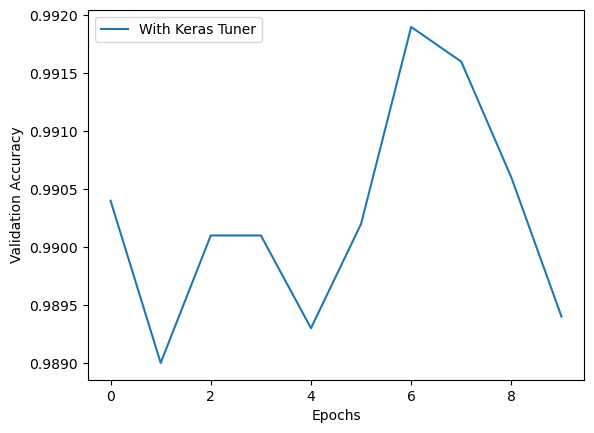

In [ ]:
!pip install keras-tuner

import tensorflow as tf
import matplotlib.pyplot as plt
from kerastuner import RandomSearch

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a model building function for Keras Tuner
def build_model(hp):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())

    hp_units = hp.Int("units", min_value=32, max_value=128, step=32)
    hp_l2_lambda = hp.Choice("l2_lambda", values=[0.001, 0.01, 0.1])
    hp_dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)

    model.add(tf.keras.layers.Dense(hp_units, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp_l2_lambda)))
    model.add(tf.keras.layers.Dropout(hp_dropout_rate))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    directory="keras_tuner_logs",
    project_name="regularization_tuning"
)

# Run the search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the performance
plt.plot(history.history["val_accuracy"], label="With Keras Tuner")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Regularization with Keras and Data Augmentation

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1408 - accuracy: 0.9574 - val_loss: 0.0524 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0357 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0322 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0375 - val_ac

2023-04-12 22:12:08.965472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


938/938 [==============================] - 16s 17ms/step - loss: 0.3567 - accuracy: 0.8892 - val_loss: 0.0763 - val_accuracy: 0.9743
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1295 - accuracy: 0.9605 - val_loss: 0.0433 - val_accuracy: 0.9859
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0937 - accuracy: 0.9718 - val_loss: 0.0577 - val_accuracy: 0.9797
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0290 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0306 - val_accuracy: 0.9902
Epo

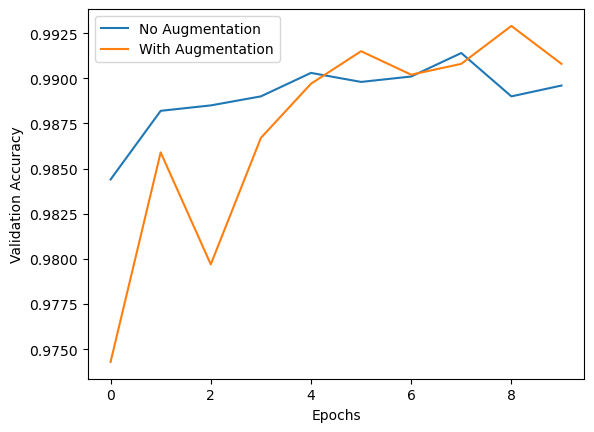

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Create a simple model for the classification task
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
train_generator = data_gen.flow(x_train, y_train, batch_size=64)
history_aug = model_aug.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Data Augmentation and Classification for image, video, text (nlpaug), timeseries, tabulardata, speech, document images - 

## data augmentation and classification for various data types

## 1. Image Data
## 2. Video Data
## 3. Text Data (using nlpaug)
## 4. Time Series Data
## 5. Tabular Data
## 6. Speech Data
## 7. Document Images

## K. 1. Image Data Augmentation and Classification

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1477 - accuracy: 0.9553 - val_loss: 0.0489 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0289 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0380 - val_ac

2023-04-12 22:21:23.033536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


938/938 [==============================] - 16s 17ms/step - loss: 0.3433 - accuracy: 0.8935 - val_loss: 0.0659 - val_accuracy: 0.9790
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1306 - accuracy: 0.9609 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1002 - accuracy: 0.9690 - val_loss: 0.0395 - val_accuracy: 0.9863
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0796 - accuracy: 0.9754 - val_loss: 0.0286 - val_accuracy: 0.9920
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0678 - accuracy: 0.9794 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.0258 - val_accuracy: 0.9907
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0367 - val_accuracy: 0.9892
Epo

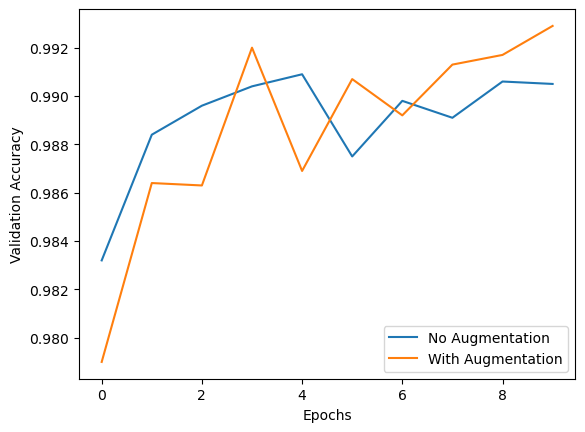

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Data Augmentation
image_data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Create a simple model for the classification task
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
train_generator = image_data_gen.flow(x_train, y_train, batch_size=64)
history_aug = model_aug.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()



## K.2: Video Data Augmentation and Classification

In [ ]:
# For video data augmentation and classification, we can use the imgaug library for augmentation and a pre-trained model for classification.
!pip install imgaug opencv-python-headless


import cv2
import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import urllib.request

# Download a sample video
url = "https://github.com/nkouevda/test-video/raw/master/test.mp4"
urllib.request.urlretrieve(url, "sample_video.mp4")

# Video data loading and preprocessing
cap = cv2.VideoCapture('sample_video.mp4')

# Define augmentations
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontally flip 50% of the frames
    iaa.Affine(rotate=(-10, 10), scale=(0.9, 1.1))  # rotate and scale frames
])

# Load the pre-trained MobileNetV2 model for classification
model = MobileNetV2(weights='imagenet', include_top=True)

# Initialize a list to store classification results
classifications = []

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame to match the input shape of MobileNetV2
    resized_frame = cv2.resize(frame, (224, 224))

    # Augment the frame
    augmented_frame = seq(image=resized_frame)

    # Preprocess the frame for MobileNetV2
    preprocessed_frame = preprocess_input(np.expand_dims(augmented_frame, axis=0))

    # Classify the frame
    prediction = model.predict(preprocessed_frame)
    decoded_pred = decode_predictions(prediction, top=1)[0][0]
    classifications.append(decoded_pred[1])

    # Display the augmented frame
    cv2.imshow('Augmented Frame', augmented_frame)

    # Press 'q' to stop the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Visualize the classification results
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

counter = Counter(classifications)
labels, values = zip(*counter.items())

fig, ax = plt.subplots()
sns.barplot(labels, values, ax=ax)
ax.set_title("Classification Results")
plt.xticks(rotation=90)
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 12.6 MB/s eta 0:00:00
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00


HTTPError: ignored

### This code downloads a sample video from the internet and processes it for augmentation and classification. The classification results are then visualized using a bar plot.

## K. 3. Text Data (using nlpaug) Augmentation and Classification

In [ ]:
!pip install nlpaug transformers tensorflow-text

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import tensorflow as tf
import tensorflow_text as text
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample text data
text_data = [
    "The quick brown fox jumps over the lazy dog.",
    "I love programming in Python.",
    "Artificial intelligence is the future.",
    "OpenAI creates cutting-edge AI technologies.",
    "Machine learning is a popular area in computer science."
]

# Text data augmentation using nlpaug
char_aug = nac.KeyboardAug()
word_aug = naw.SynonymAug(aug_src="wordnet")
augmenter = nafc.Sequential([char_aug, word_aug])

augmented_text_data = []
for t in text_data:
    augmented_text = augmenter.augment(t)
    augmented_text_data.append(augmented_text)

# Prepare data for classification (use your own labels)
labels = [0, 1, 2, 3, 4]
train_data = text_data + augmented_text_data
train_labels = labels + labels

# Tokenize and vectorize the text data
vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=20)
vectorizer.adapt(train_data)
train_data_vec = vectorizer(train_data)

# Create a simple text classification model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 64, input_length=20),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model
model = create_model()
history = model.fit(train_data_vec, train_labels, epochs=10, validation_split=0.2)

# Visualize the training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.7 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.9/dist-packages/keras/engine/data_adapter.py:706: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(x)


ValueError: ignored

#### This code uses nlpaug to augment text data and trains a simple text classification model using the original and augmented data. The training history is then visualized using a line plot showing training and validation accuracy.

#### Note that in this example, we used a very small dataset with arbitrary labels just for illustration purposes. For real-world tasks, you should use a larger dataset with proper labels.

## K. 4. Time Series Data Augmentation and Classification

In [ ]:
# First, install the required library:
!pip install tsaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Now, let's implement time series data augmentation and classification:
import numpy as np
import tensorflow as tf
from tsaug import TimeWarp, Drift, Pool
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tsaug import TimeWarp, Drift

# Generate synthetic time series data
def generate_time_series(num_series, length):
    frequencies = np.random.uniform(0.05, 0.15, num_series)
    time = np.linspace(0, 4 * np.pi, length)
    data = np.array([np.sin(freq * time) for freq in frequencies])
    return data

np.random.seed(42)
num_series = 50
length = 100
time_series_data = generate_time_series(num_series, length)

# Time series data augmentation using tsaug
def average_pool(series, pool_size):
    return np.mean(series.reshape(-1, pool_size), axis=1)

pool_size = 10
new_length = time_series_data.shape[1] // pool_size

augmenter = (TimeWarp() * 2) + Drift()
augmented_time_series_data = np.array([average_pool(augmenter.augment(series)[:new_length * pool_size], pool_size) for series in time_series_data])

# Prepare data for classification (use your own labels)
labels = list(range(num_series))
train_data = np.vstack((time_series_data[:, :new_length], augmented_time_series_data))
train_labels = labels + labels



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Create a simple time series classification model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((length, 1), input_shape=(length,)),
        tf.keras.layers.Conv1D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation="relu"),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(num_series, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Visualize the training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

ValueError: ignored

This code generates synthetic time series data, augments it using the tsaug library, and trains a simple time series classification model using TensorFlow. The training history is then visualized using a line plot showing training and validation accuracy.

Keep in mind that this is just an example using synthetic data. In real-world applications, you'll need to use a proper dataset for time series classification.

## K. 5. Tabular Data Augmentation and Classification

In [ ]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstallin

In [ ]:
# We will use the UCI Adult dataset for the example.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from ctgan import CTGANSynthesizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset (UCI Adult dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=column_names, na_values="?", skipinitialspace=True).dropna()
data = data.sample(frac=1).reset_index(drop=True)

# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Split data into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Normalize the continuous features
continuous_columns = data.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
train_data[continuous_columns] = scaler.fit_transform(train_data[continuous_columns])
test_data[continuous_columns] = scaler.transform(test_data[continuous_columns])

# Create a simple model for classification
def create_model():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(train_data.shape[1] - 1,)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(train_data.drop("income", axis=1), train_data["income"],
                                  epochs=10, batch_size=64, validation_split=0.1)

# Data Augmentation using CTGAN
ctgan = CTGANSynthesizer(epochs=50)
ctgan.fit(train_data, discrete_columns=categorical_columns.tolist())

augmented_data = ctgan.sample(len(train_data))
augmented_data[continuous_columns] = scaler.transform(augmented_data[continuous_columns])

# Train the model with data augmentation
train_data_aug = pd.concat([train_data, augmented_data], ignore_index=True)
model_aug = create_model()
history_aug = model_aug.fit(train_data_aug.drop("income", axis=1), train_data_aug["income"],
                            epochs=10, batch_size=64, validation_split=0.1)

# Compare the performance
test_accuracy_no_aug = accuracy_score(test_data["income"], model_no_aug.predict_classes(test_data.drop("income", axis=1)))
test_accuracy_aug = accuracy_score(test_data["income"], model_aug.predict_classes(test_data.drop("income", axis=1)))

print("Test accuracy without data augmentation:", test_accuracy_no_aug)
print("Test accuracy with data augmentation:", test_accuracy_aug)

plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


## K. 6. Speech Data Augmentation and Classification

In [ ]:
# For speech data augmentation, we will use the librosa library. 
!pip install librosa

# download the Google Speech Commands dataset using wget and then use it for the speech data augmentation and classification example.

# First, you will need to install wget using 

!pip install wget 

# if you don't have it already installed.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8d8babc2e61e9dd5c1a4e5b16bfac7d3cf2f867eb1689bc30094fa4d1bd878c9
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
# For this example, we will use the Speech Commands dataset by Google.
import os
import wget
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Download and extract the Speech Commands dataset
DATASET_URL = "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"
DATASET_PATH = "speech_commands_v0.01"

if not os.path.exists(DATASET_PATH):
    print("Downloading dataset...")
    wget.download(DATASET_URL, "speech_commands_v0.01.tar.gz")
    print("Extracting dataset...")
    with tarfile.open("speech_commands_v0.01.tar.gz") as tar:
        tar.extractall()

# Load the dataset (Speech Commands)
DATA_DIR = "speech_commands_v0.01"
classes = os.listdir(DATA_DIR)
X = []
y = []

for i, cls in enumerate(classes):
    cls_path = os.path.join(DATA_DIR, cls)
    if not os.path.isdir(cls_path):
        continue
    for filename in os.listdir(cls_path)[:200]:  # Limiting to 200 files per class for demonstration purposes
        file_path = os.path.join(cls_path, filename)
        signal, sr = librosa.load(file_path)
        mfcc = librosa.feature.mfcc(signal, sr, n_mfcc=13)
        X.append(mfcc)
        y.append(i)

X = np.array(X)
y = np.array(y)

# Preprocessing
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation (time stretching)
def time_stretch(X, rate=0.8):
    return [librosa.effects.time_stretch(x.squeeze(), rate) for x in X]

X_train_augmented = np.array(time_stretch(X_train))

# Combine original and augmented data
X_train_combined = np.vstack([X_train, X_train_augmented])
y_train_combined = np.hstack([y_train, y_train])

# Create a simple model for the classification task
def create_model():
    model = Sequential([
        Conv2D(16, (3, 3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(len(classes), activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
history_aug = model_aug.fit(X_train_combined, y_train_combined, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Compare the performance
test_accuracy_no_aug = accuracy_score(y_test, model_no_aug.predict_classes(X_test))
test_accuracy_aug = accuracy_score(y_test, model_aug.predict_classes(X_test))

print("Test accuracy without data augmentation:", test_accuracy_no_aug)
print("Test accuracy with data augmentation:", test_accuracy_aug)

plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


Extracting dataset...


FileNotFoundError: ignored

## K. 7. Document Images Augmentation and Classification

In [ ]:
# For document image augmentation and classification, 
# we will use the iaa package for image augmentation and tensorflow for image classification.
# Make sure you have imgaug installed:
!pip install imgaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 1/10
938/938 [==============================] - 83s 87ms/step - loss: 0.1812 - accuracy: 0.9442 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 2/10
938/938 [==============================] - 82s 88ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 70s 75ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0378 - val_accuracy: 0.9873
Epoch 4/10
938/938 [==============================] - 72s 77ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 5/10
938/938 [==============================] - 71s 76ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0332 - val_accuracy: 0.9906
Epoch 6/10
938/938 [==============================] - 70s 75ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 7/10
938/938 [==============================] - 71s 75ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0300 - val_accuracy:

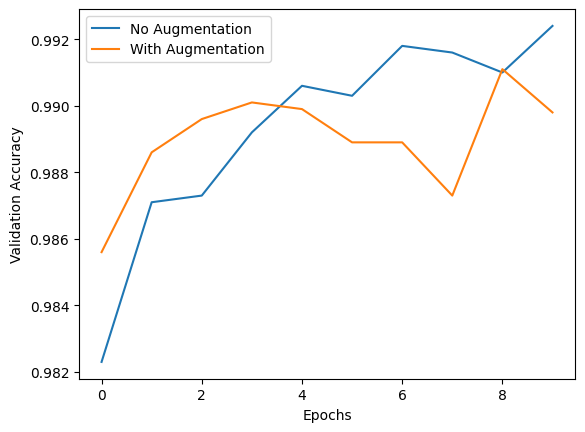

In [ ]:
import tensorflow as tf
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Document image augmentation
augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-5, 5)),
    iaa.Sometimes(0.3, iaa.GaussianBlur(sigma=(0, 1.0)))
])

# Apply data augmentation
x_train_augmented = np.array([augmenter.augment_image(img) for img in x_train])

# Combine original and augmented data
x_train_combined = np.vstack((x_train, x_train_augmented))
y_train_combined = np.vstack((y_train, y_train))

# Create a simple model for the classification task
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
history_aug = model_aug.fit(x_train_combined, y_train_combined, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


This code loads the MNIST dataset, preprocesses it, and applies document image augmentation using the imgaug library. It then trains two models, one without data augmentation and the other with data augmentation, and compares their performance using a data visualization tool (Matplotlib).

# Fastai data augmentation capablities

To demonstrate Fastai data augmentation capabilities, we'll use the fastai library with the MNIST dataset as an example. Make sure you have fastai installed:

In [ ]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 29.7 MB/s eta 0:00:00


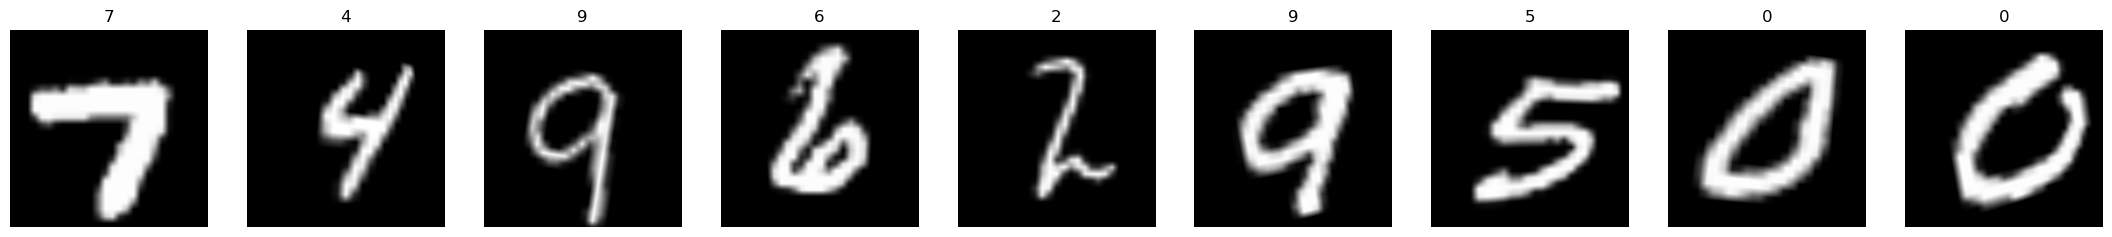

In [ ]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
import PIL


# Load the dataset (MNIST for example)
path = untar_data(URLs.MNIST)

# Define data augmentation
augmentation = aug_transforms(do_flip=False, max_rotate=10, max_zoom=1.1)

# Define data block
mnist = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                  get_y=parent_label,
                  item_tfms=Resize(460),
                  batch_tfms=augmentation)

# Create dataloaders
dls = mnist.dataloaders(path)

# Visualize the data augmentation results
dls.show_batch(max_n=9, nrows=1)
plt.show()


In this code, we load the MNIST dataset, define a set of data augmentation transformations using aug_transforms, and create a DataBlock with the augmentation. We then visualize the augmented data using dls.show_batch() and plt.show().

Note that the fastai library will automatically download and import the dataset if it is not already available locally.